In [242]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('medical_cost_insurance.csv')

In [243]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [244]:
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

Note1: Regression model will be applied

In [245]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Note2: Combination of object and float

In [246]:
df.shape

(1338, 7)

In [247]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(1337, 7)

In [248]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']




# EDA
  # 1. Null/NaN

In [249]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

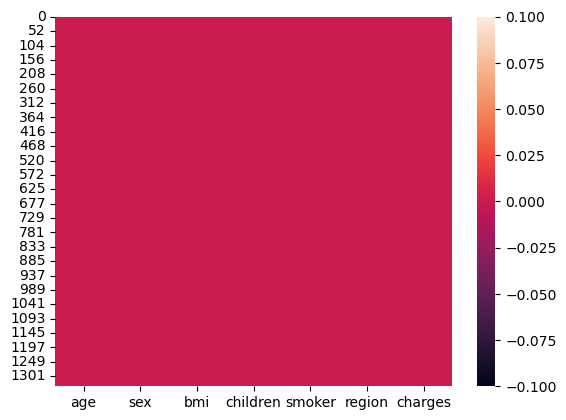

In [250]:
sns.heatmap(df.isnull())

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [252]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      675
female    662
Name: count, dtype: int64


bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1063
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


charges
16884.92400    1
2117.33885     1
2221.56445   

### Note3: Zero null values

# 2. Label Encoder

In [253]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [254]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   float64
 5   region    1337 non-null   float64
 6   charges   1337 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 83.6 KB


# 3. Skewness, Outliars

In [256]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - No values observed
- Median (50%) < Mean - Slight deviation in "charges" -> Right Skewed
- Standard Dev for "Charges" and "age" is high -> Outliars are present
- For "Charges" ": 75% and max : Diff is high - outliars are present


In [257]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

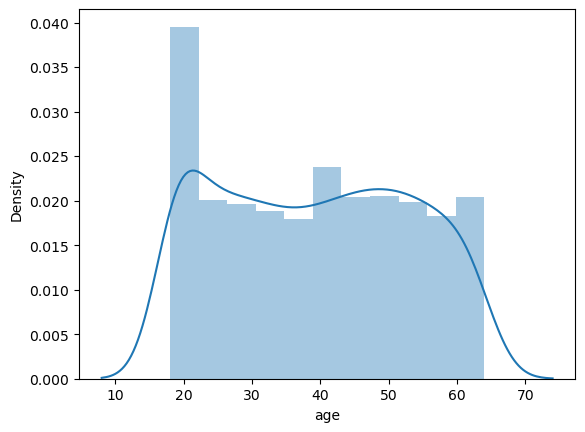

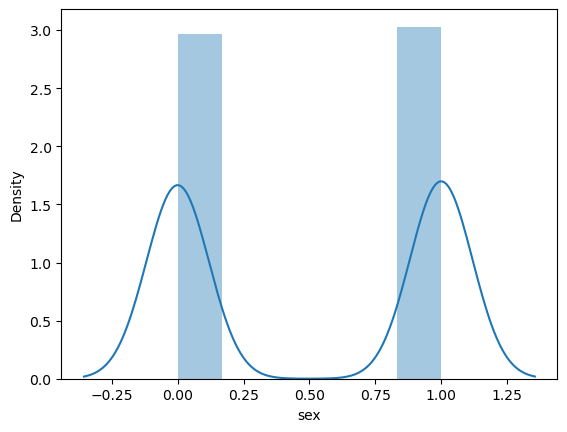

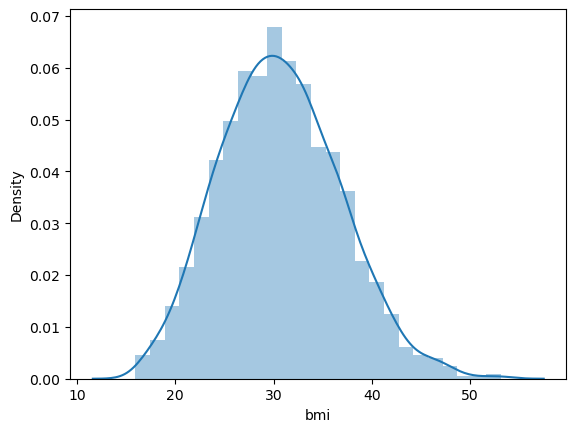

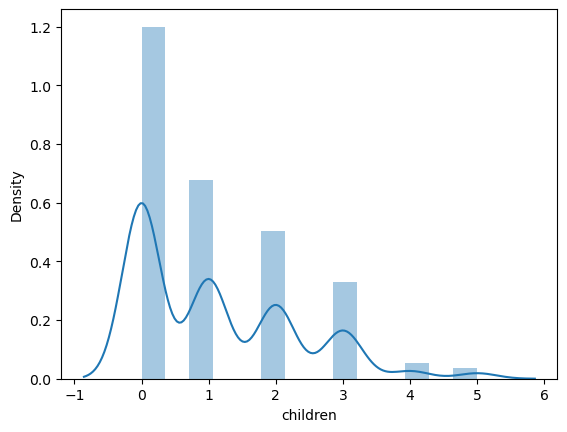

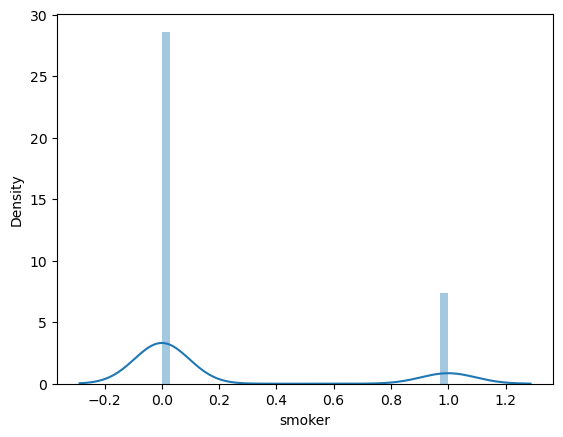

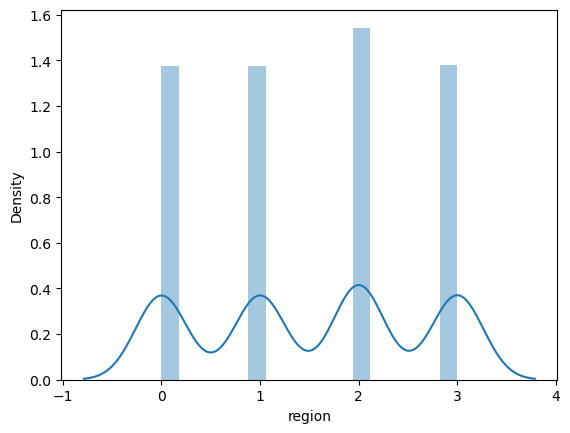

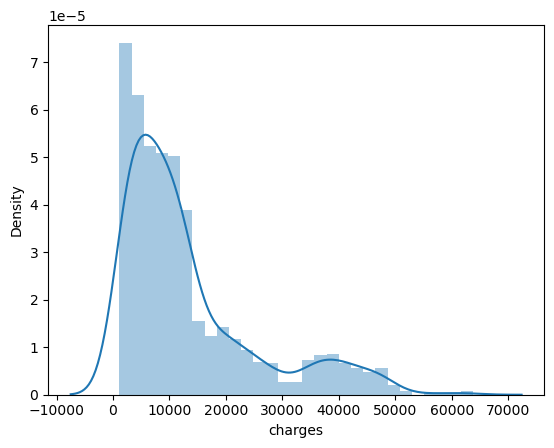

In [258]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

- We donot remove Skewness and Outliars from cataegorial columns.
- "Charges" are right skewed

In [259]:
df["charges"]=np.cbrt(df["charges"])

In [260]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     0.515480
dtype: float64

- We donot remove Skewness in "Smoker" as it is categoreal column

In [261]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

age            Axes(0.125,0.53;0.168478x0.35)
sex         Axes(0.327174,0.53;0.168478x0.35)
bmi         Axes(0.529348,0.53;0.168478x0.35)
children    Axes(0.731522,0.53;0.168478x0.35)
smoker         Axes(0.125,0.11;0.168478x0.35)
region      Axes(0.327174,0.11;0.168478x0.35)
charges     Axes(0.529348,0.11;0.168478x0.35)
dtype: object

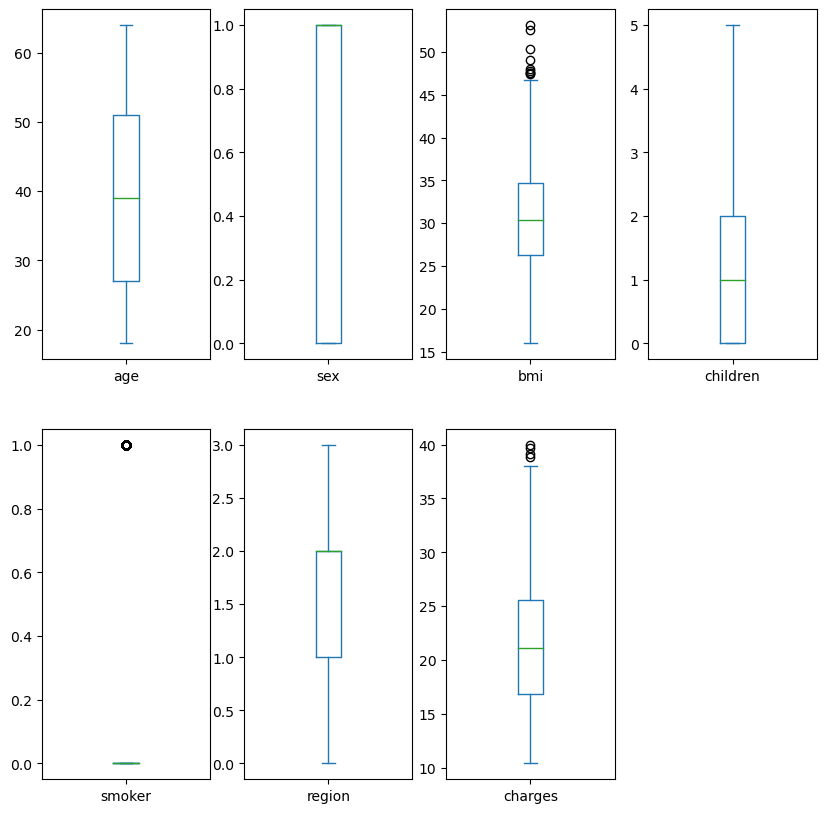

In [262]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

Outliars observed in BMI, Charges and Smoker. But as Smoker is categorical - outliars will not be considered in it.

In [263]:
from scipy.stats import zscore
col = df["bmi"]
z=zscore(col)
thresh =3
df1 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)


Data loss rate 0.2991772625280479


### Data Loss is less than 1%

In [264]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


# 4. Co- Relation

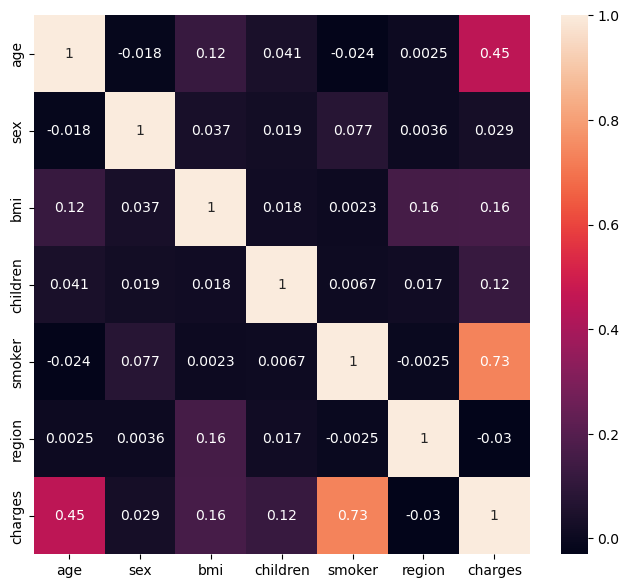

In [265]:
corr_hmap=df1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

-  Near to Zero : No Corelation- Low Corelation  Worst - [" sex", "region"]
- >0.3 or >-0.3  -->  Others - ["bmi", "children"
- >0.5 or >-0.5  --> Mod Corelation - "age"
- >0.7 or >-0.7  --> High Corelation   - "smoker"

In [266]:
cor=df1.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017987,0.118978,0.041406,-0.024390,0.002473,0.451897
sex,-0.017987,1.000000,0.037046,0.019357,0.076510,0.003641,0.029422
bmi,0.118978,0.037046,1.000000,0.018058,0.002264,0.155889,0.161734
children,0.041406,0.019357,0.018058,1.000000,0.006744,0.016924,0.122507
smoker,-0.024390,0.076510,0.002264,0.006744,1.000000,-0.002510,0.732230
region,0.002473,0.003641,0.155889,0.016924,-0.002510,1.000000,-0.030216
charges,0.451897,0.029422,0.161734,0.122507,0.732230,-0.030216,1.000000


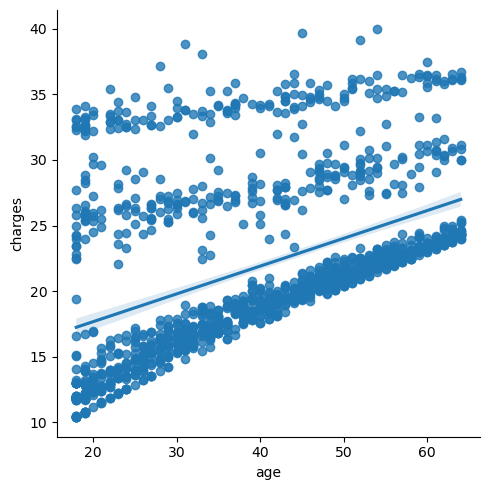

In [267]:
sns.lmplot(x="age",y="charges",data=df,palette="colorblind")

With increase in Age, Charges are increasing (+ve relation)

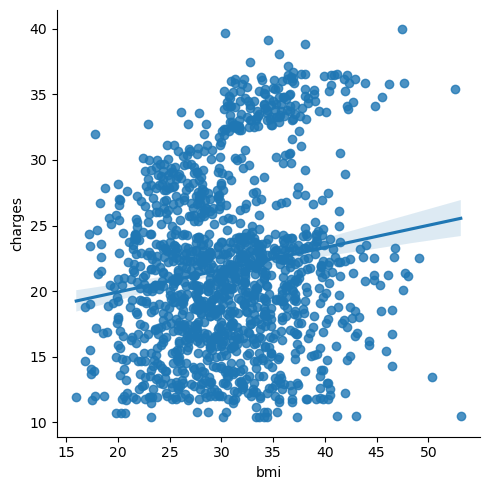

In [268]:
sns.lmplot(x="bmi",y="charges",data=df,palette="colorblind")

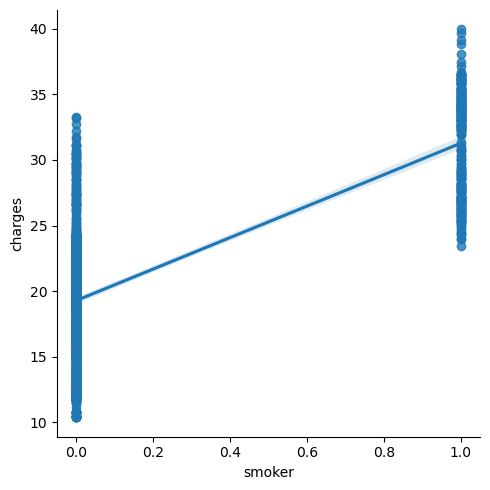

In [269]:
sns.lmplot(x="smoker",y="charges",data=df,palette="colorblind")

In [270]:
# Charges are higher for smokers

# 5. MultiColinearity

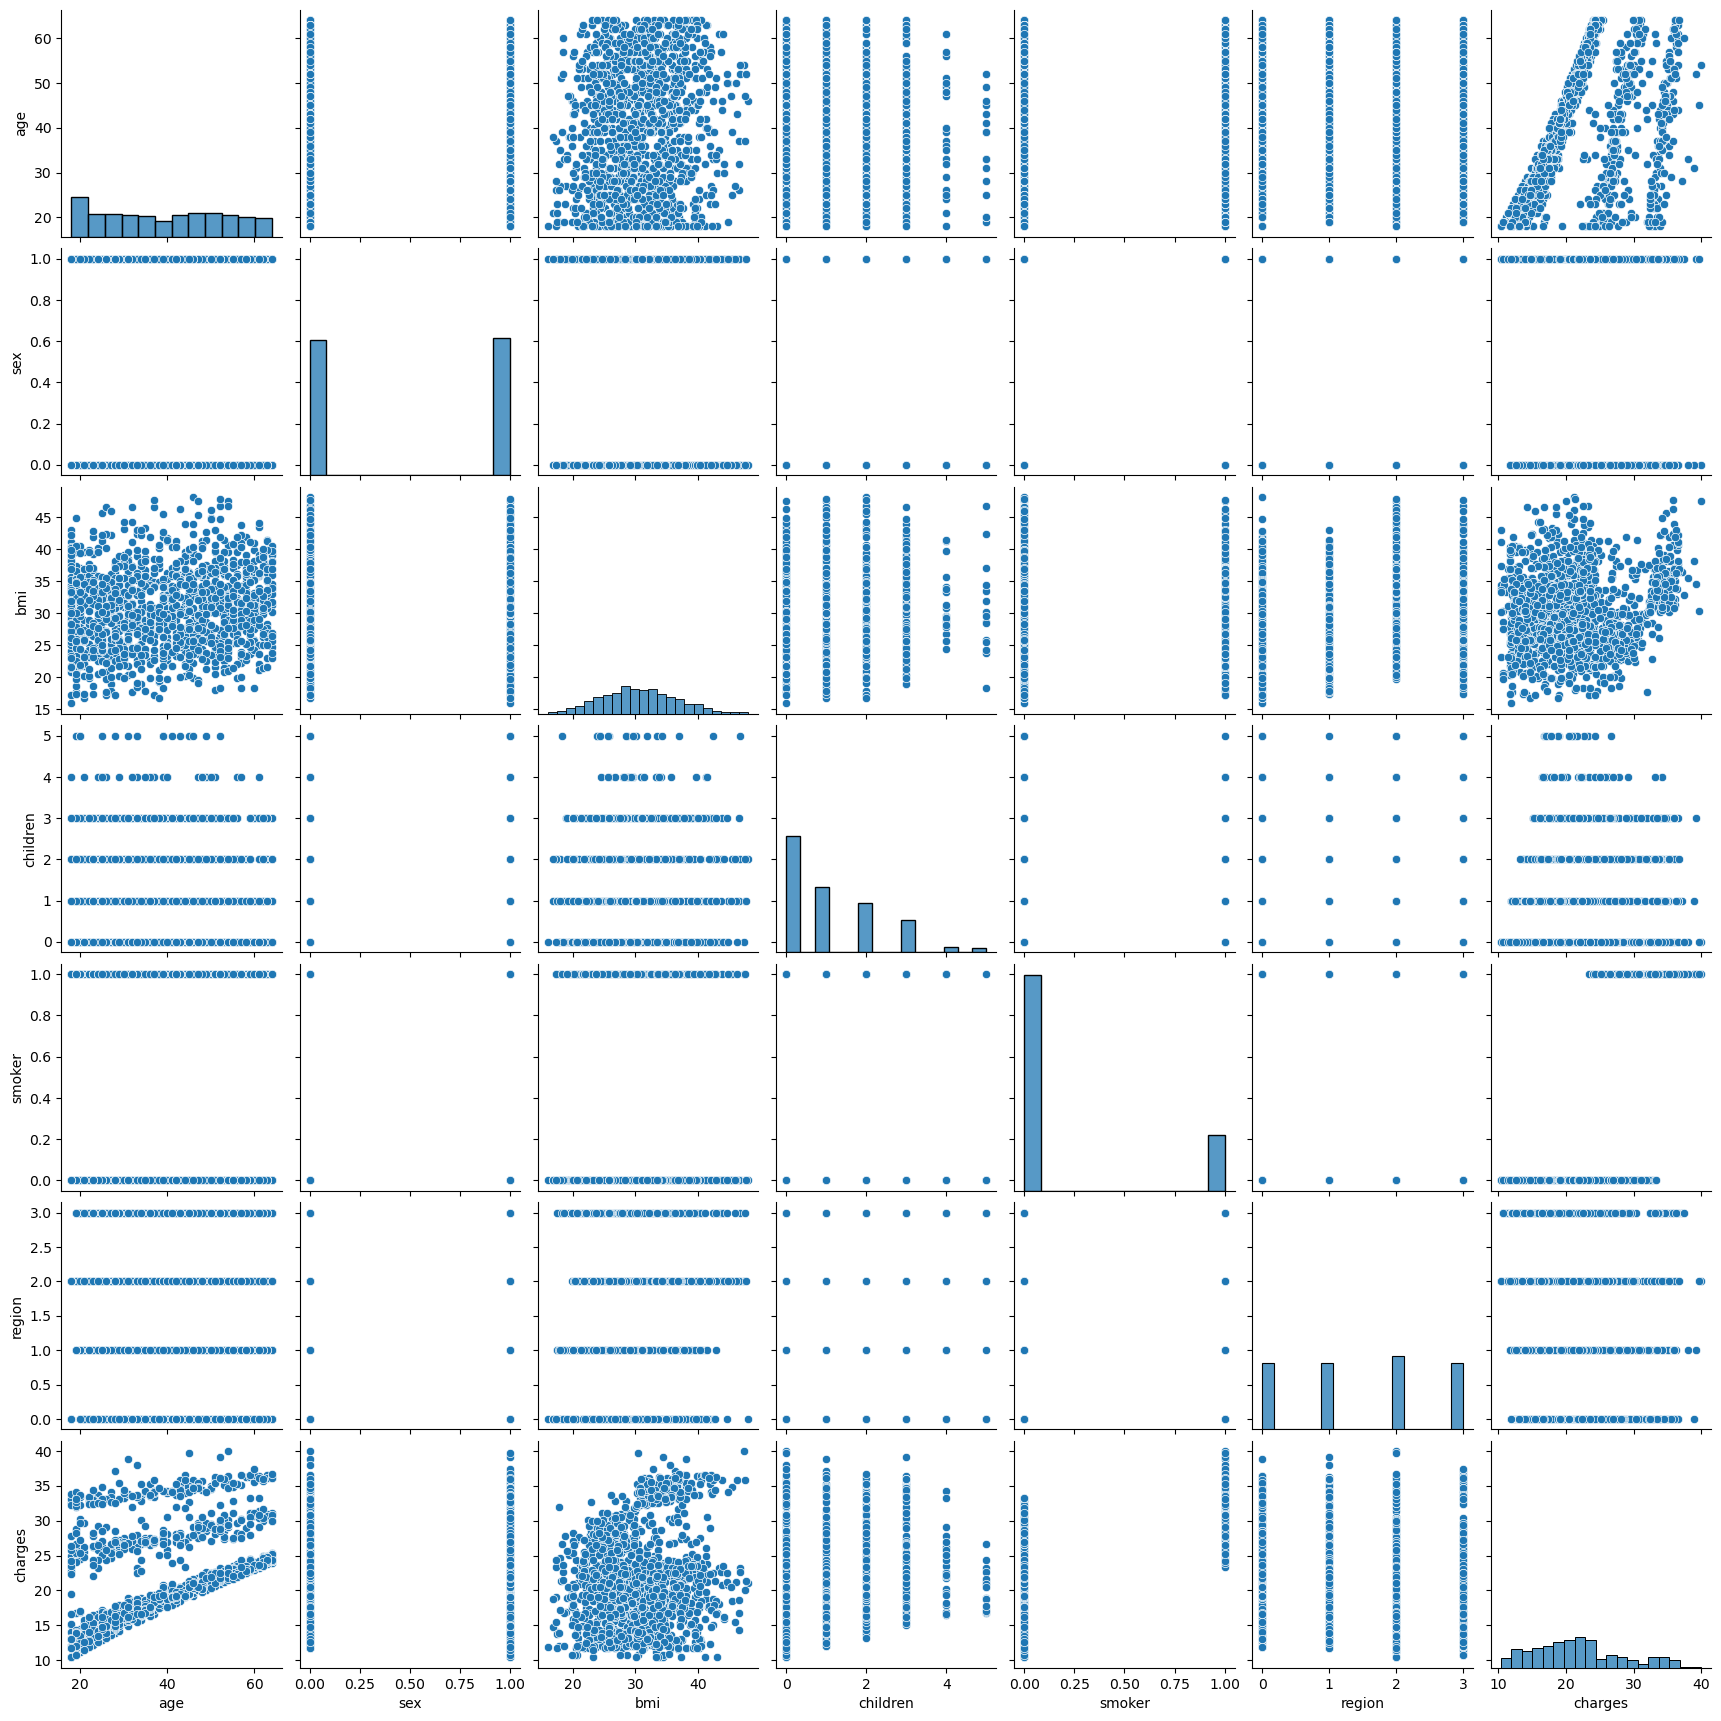

In [271]:
sns.pairplot(df1)

### Sex and Region has no corelation with any other elements

In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df1.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor  features
0    7.677373       age
1    1.989718       sex
2   10.507018       bmi
3    1.805843  children
4    1.256912    smoker
5    2.915503    region


In [273]:
columns_to_drop=["sex","region"] # Least co-relation with output
df2 = df1.drop(columns_to_drop, axis=1)
df2

,age,bmi,children,smoker,charges
0,19,27.900,0,1.0,25.654666
1,18,33.770,1,0.0,11.994331
2,28,33.000,3,0.0,16.447599
3,33,22.705,0,0.0,28.013799
4,32,28.880,0,0.0,15.695891
...,...,...,...,...,...
1333,50,30.970,3,0.0,21.967271
1334,18,31.920,0,0.0,13.017690
1335,18,36.850,0,0.0,11.768318
1336,21,25.800,0,0.0,12.615872


In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df2.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor  features
0    7.662913       age
1    8.199333       bmi
2    1.801933  children
3    1.246963    smoker


# MODEL

# 1. Feature Scaling using Standard Scalarization

In [275]:
# to remove biasness. Standard Scaler consider Zero as mean and 1 as std dev value
x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,bmi,children,smoker
0,-1.443917,-0.450191,-0.909922,1.970478
1,-1.515225,0.527991,-0.080854,-0.507491
2,-0.802147,0.399678,1.577282,-0.507491
3,-0.445607,-1.315891,-0.909922,-0.507491
4,-0.516915,-0.286883,-0.909922,-0.507491
...,...,...,...,...
1328,0.766626,0.061396,1.577282,-0.507491
1329,-1.515225,0.219705,-0.909922,-0.507491
1330,-1.515225,1.041245,-0.909922,-0.507491
1331,-1.301302,-0.800137,-0.909922,-0.507491


# 2. Best random state value:

In [276]:
y.unique() # Will apply regression model

array([25.6546663 , 11.99433135, 16.44759868, ..., 11.76831849,
       12.61587191, 30.77300732])

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.8317375278844652  at random state  12


# 3. Creating train test split

In [278]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# 4. Classification Algorithms and Cross Validation Score

R2_score:   LinearRegression()  is  0.8317375278844652
R2_score_Training Data:   LinearRegression()  is  75.27822600210705
error:
Mean Absolute error 1.7859011062252137
Mean Squared error 7.3974958857344015
Root Mean Squared error 2.7198337974468956


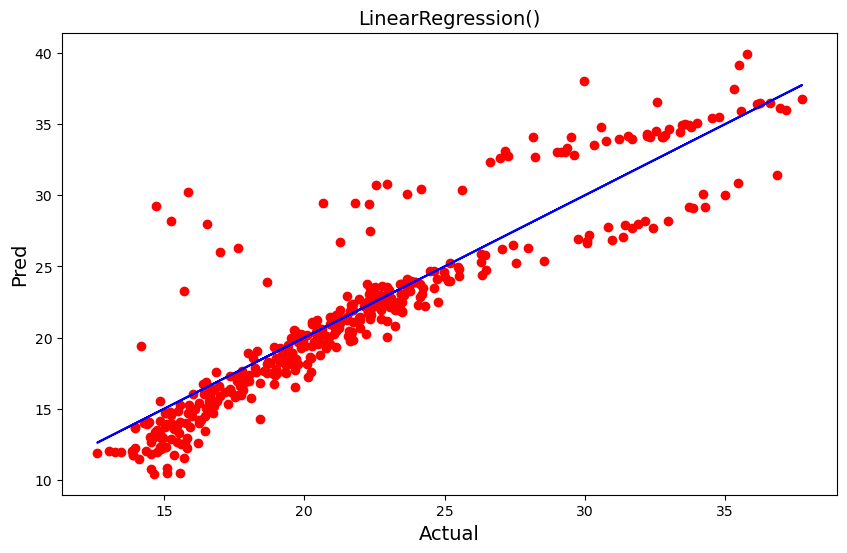

Cross Validation of:   LinearRegression()  is 
[0.80640518 0.70684371 0.82704072 0.76564492 0.76634259]
0.7744554237205641
Diff in Acc Score and Cross Val Score is -  5.7282104163901115


R2_score:   RandomForestRegressor()  is  0.8443154567806797
R2_score_Training Data:   RandomForestRegressor()  is  96.33960135302708
error:
Mean Absolute error 1.478656818017219
Mean Squared error 6.844519478749732
Root Mean Squared error 2.616203256390782


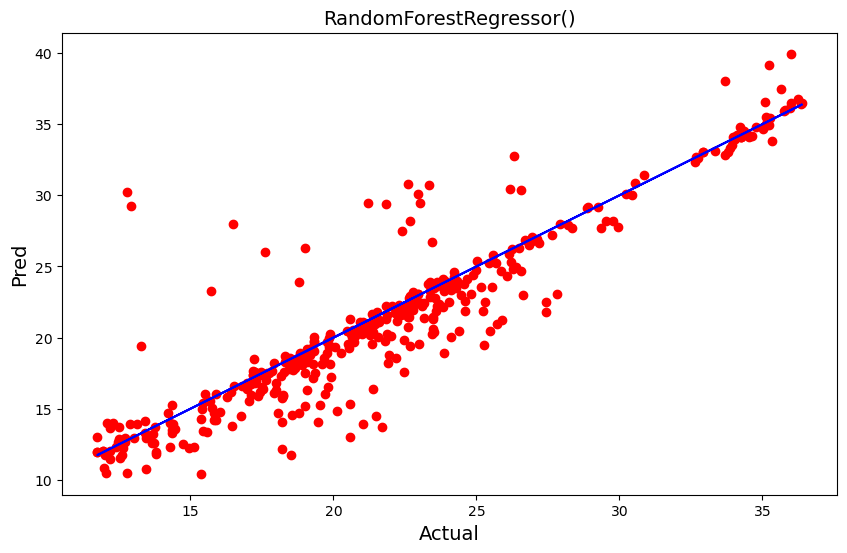

Cross Validation of:   RandomForestRegressor()  is 
[0.81190641 0.70150911 0.8230896  0.80388264 0.7910953 ]
0.7862966125987361
Diff in Acc Score and Cross Val Score is -  5.8018844181943585


R2_score:   DecisionTreeRegressor()  is  0.7199946777070639
R2_score_Training Data:   DecisionTreeRegressor()  is  99.53933837108686
error:
Mean Absolute error 1.6434661688599634
Mean Squared error 12.310161580316482
Root Mean Squared error 3.508583985073819


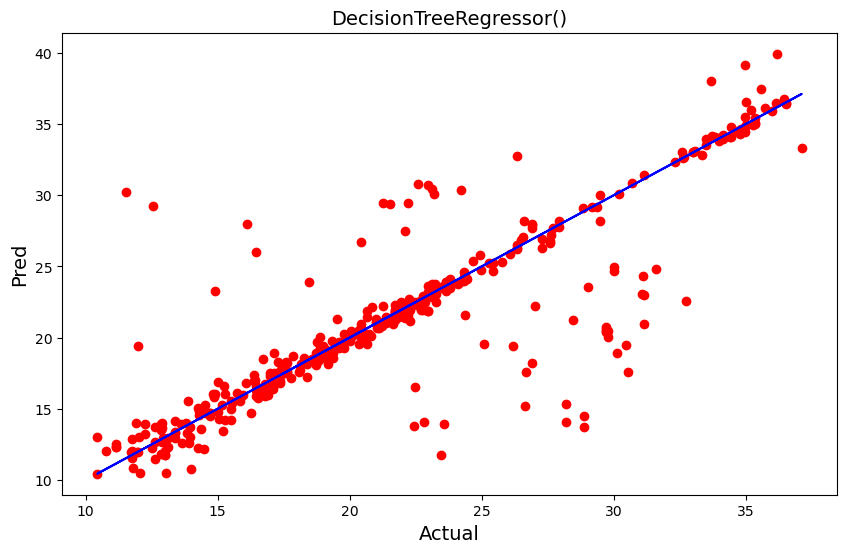

Cross Validation of:   DecisionTreeRegressor()  is 
[0.62667151 0.56142899 0.61627503 0.68056525 0.61815153]
0.6206184624799902
Diff in Acc Score and Cross Val Score is -  9.937621522707374


R2_score:   KNeighborsRegressor()  is  0.8483323449234482
R2_score_Training Data:   KNeighborsRegressor()  is  84.92142924445676
error:
Mean Absolute error 1.535501947916119
Mean Squared error 6.6679208995419925
Root Mean Squared error 2.5822317672009985


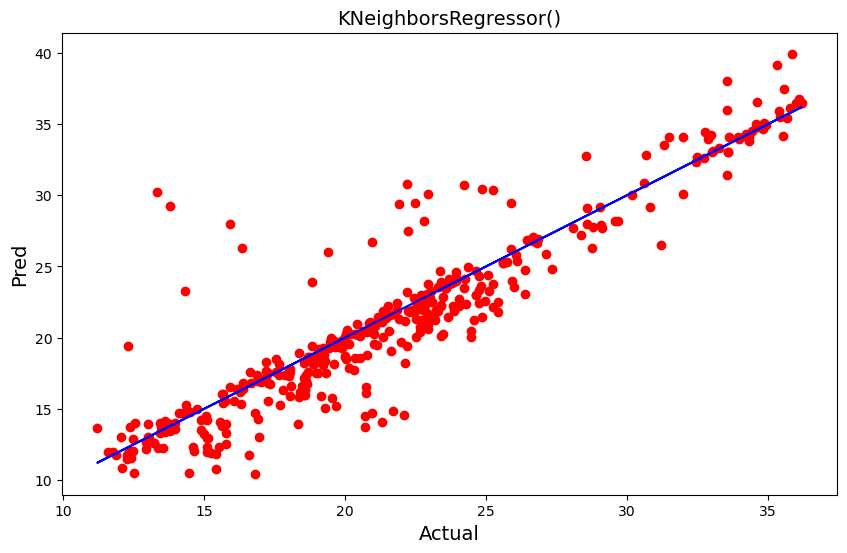

Cross Validation of:   KNeighborsRegressor()  is 
[0.84943702 0.70485608 0.84244868 0.79858322 0.7899881 ]
0.7970626207631787
Diff in Acc Score and Cross Val Score is -  5.126972416026954


R2_score:   Lasso()  is  0.7396453128744944
R2_score_Training Data:   Lasso()  is  68.32097627882001
error:
Mean Absolute error 2.5205410747417574
Mean Squared error 11.446240523080842
Root Mean Squared error 3.383229303946282


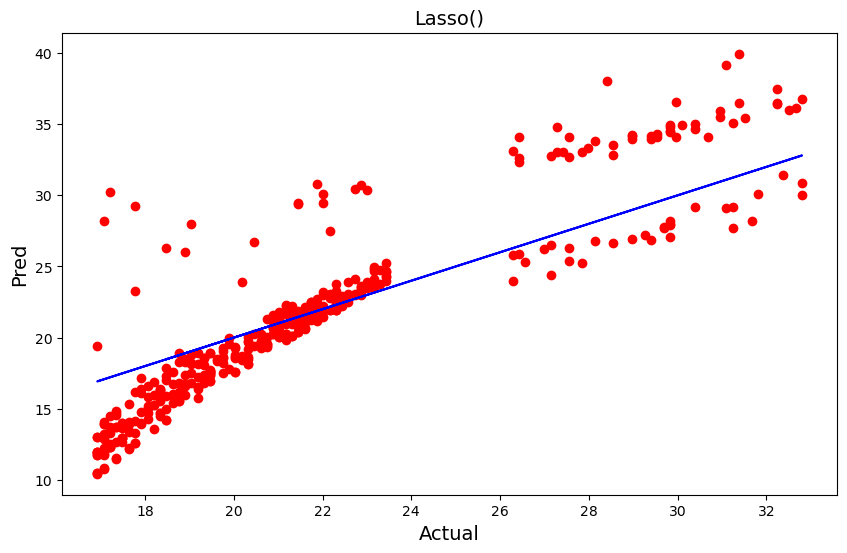

Cross Validation of:   Lasso()  is 
[0.73381116 0.66471589 0.72692982 0.70622    0.70546812]
0.7074289972457363
Diff in Acc Score and Cross Val Score is -  3.221631562875815


R2_score:   Ridge()  is  0.8316535821226158
R2_score_Training Data:   Ridge()  is  75.2781383956328
error:
Mean Absolute error 1.7878437676419445
Mean Squared error 7.401186479484145
Root Mean Squared error 2.7205121722727403


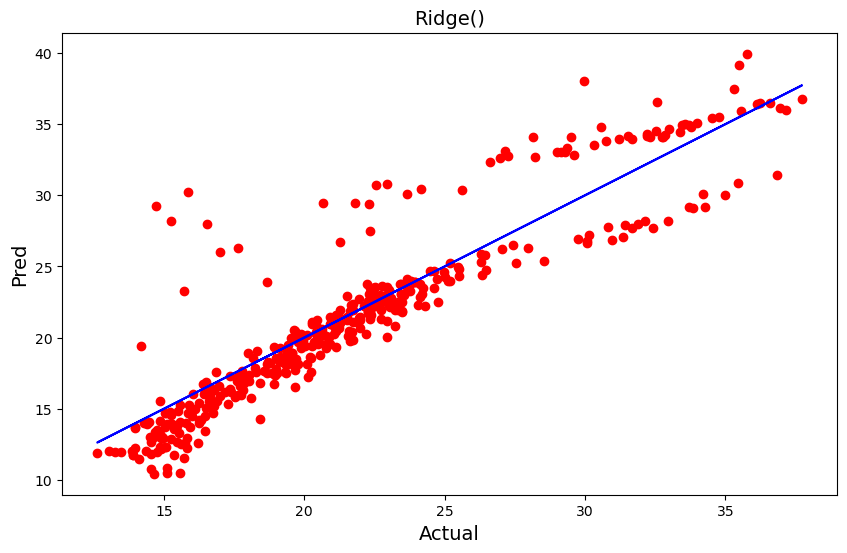

Cross Validation of:   Ridge()  is 
[0.80636917 0.7069637  0.82692181 0.76568424 0.76635172]
0.7744581280732771
Diff in Acc Score and Cross Val Score is -  5.719545404933868


R2_score:   SVR()  is  0.8773672274173187
R2_score_Training Data:   SVR()  is  79.67170386947889
error:
Mean Absolute error 1.005420385667317
Mean Squared error 5.391430538436938
Root Mean Squared error 2.3219454210719377


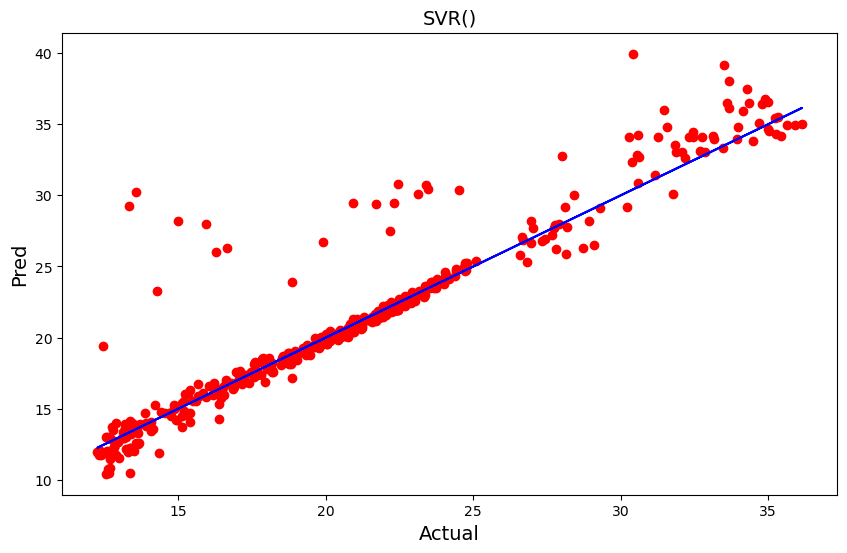

Cross Validation of:   SVR()  is 
[0.8762458  0.72514258 0.8742699  0.80961376 0.80193901]
0.817442208524122
Diff in Acc Score and Cross Val Score is -  5.9925018893196675


R2_score:   ExtraTreesRegressor()  is  0.7982962804217633
R2_score_Training Data:   ExtraTreesRegressor()  is  99.53933837108686
error:
Mean Absolute error 1.5335860414120475
Mean Squared error 8.867707795787066
Root Mean Squared error 2.977869674076934


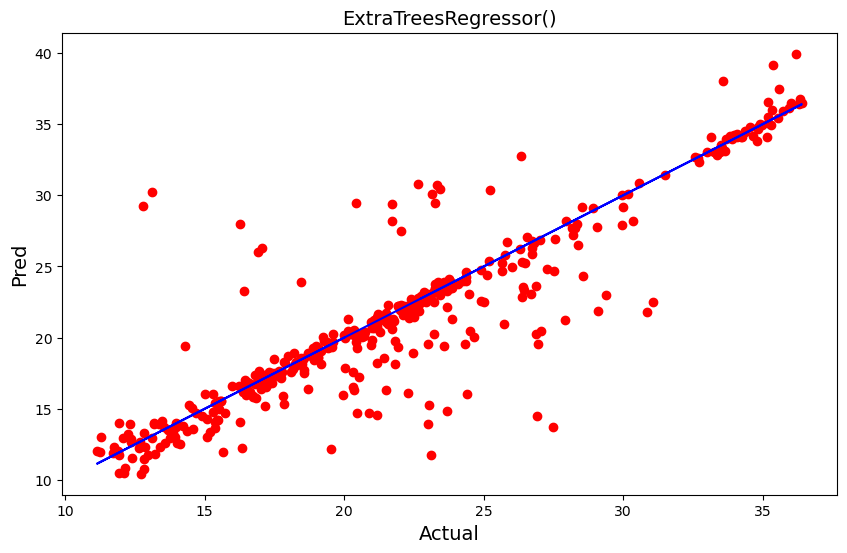

Cross Validation of:   ExtraTreesRegressor()  is 
[0.74210759 0.64368633 0.79178387 0.78952938 0.76205307]
0.7458320488210062
Diff in Acc Score and Cross Val Score is -  5.246423160075708




In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB


lr= LinearRegression()
rfc=RandomForestRegressor()
dtr=DecisionTreeRegressor()
kn=KNN()
ls=Lasso()
rd=Ridge()
svr=SVR()
etr=ExtraTreesRegressor()




model=[lr,rfc,dtr,kn,ls,rd,svr,etr]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    
    print("R2_score:  ",m," is " ,r2_score(y_test,predm))
    print("R2_score_Training Data:  ",m," is " ,r2_score(y_train,pred_train)*100)
    print("error:")
    
    print("Mean Absolute error",mean_absolute_error(y_test,predm))
    print("Mean Squared error",mean_squared_error(y_test,predm))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,predm)))
   
    plt.figure(figsize=(10,6))
    plt.scatter(x=predm,y=y_test,color="r")
    plt.plot(predm,predm,color="b")
    plt.xlabel("Actual",fontsize=14)
    plt.ylabel("Pred",fontsize=14)
    plt.title(m,fontsize=14)
    plt.show()
    score = cross_val_score(m,x,y)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",(r2_score(y_test,predm)-score.mean())*100)
    print("\n")

## SVR is the best model with least error

# 5. Hyper Parameter Tuning

In [281]:
parameters = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

# Instantiate GridSearchCV without "precomputed" kernel
GCV = GridSearchCV(SVR(), parameters, cv=5)
GCV.fit(x_train, y_train)
print(GCV.best_params_)

{'gamma': 'auto', 'kernel': 'rbf'}


In [282]:
Final_model = SVR(kernel="rbf",gamma="auto")
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

print("R2_score:",r2_score(y_test,pred))

print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

87.72868389852412
R2_score: 0.8772868389852412
Mean Absolute error 1.0054993050193044
Mean Squared error 5.394964737644147
Root Mean Squared error 2.3227063390889833


# 6. Regularization

In [283]:
from sklearn.datasets import make_regression
reg = [0.1, .01, .001,1,10]

for C in reg:
    svr_r = SVR(kernel="rbf",gamma="auto",C=C)
    svr_r.fit(x_train,y_train)
    pred=svr_r.predict(x_test)
    acc=r2_score(y_test,pred)
    print("Regularization of SVR with:  ",C," is " )
    print(acc*100)
    print("R2_score:",r2_score(y_test,pred))
    print("Mean Absolute error",mean_absolute_error(y_test,pred))
    print("Mean Squared error",mean_squared_error(y_test,pred))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n")

Regularization of SVR with:   0.1  is 
69.92017295061117
R2_score: 0.6992017295061118
Mean Absolute error 2.0871026100109695
Mean Squared error 13.22430331872632
Root Mean Squared error 3.6365235209917617


Regularization of SVR with:   0.01  is 
16.69116496383387
R2_score: 0.1669116496383387
Mean Absolute error 4.575947109588002
Mean Squared error 36.6259188205798
Root Mean Squared error 6.0519351302356


Regularization of SVR with:   0.001  is 
1.700046533383126
R2_score: 0.01700046533383126
Mean Absolute error 5.122839835088273
Mean Squared error 43.216618191481174
Root Mean Squared error 6.573934757166454


Regularization of SVR with:   1  is 
87.72868389852412
R2_score: 0.8772868389852412
Mean Absolute error 1.0054993050193044
Mean Squared error 5.394964737644147
Root Mean Squared error 2.3227063390889833


Regularization of SVR with:   10  is 
88.88580272171306
R2_score: 0.8888580272171306
Mean Absolute error 0.8801237571614187
Mean Squared error 4.886248704518912
Root Mean Squar

In [284]:
#Regularization of SVR with 10 has best results with reduced errors

In [285]:
from sklearn.datasets import make_regression
svr_r = SVR(kernel="rbf",gamma="auto",C=10)
svr_r.fit(x_train,y_train)
pred=svr_r.predict(x_test)
acc=r2_score(y_test,pred)
print("Regularization of SVR with:  ",10," is " )
print(acc*100)
print("R2_score:",r2_score(y_test,pred))
print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))
print("\n")

Regularization of SVR with:   10  is 
88.88580272171306
R2_score: 0.8888580272171306
Mean Absolute error 0.8801237571614187
Mean Squared error 4.886248704518912
Root Mean Squared error 2.210486078788761




# Saving the Model

In [286]:
import joblib # save as *.pkl
joblib.dump(svr_r,"MedicalCost.pkl")

['MedicalCost.pkl']